# **1. BLIBIOTECAS**





In [ ]:
#pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import catboost

# **2. DATAFRAME**

In [ ]:
# Conectando a base de dados de produção.

#path = "C://Users//sodre//Videos//StudentsPerformance.csv"  #Windows

#path = "/home/isac/Documentos/api_streamlit/data/StudentsPerformance.csv"  #Linux

path = "/content/StudentsPerformance.csv"

In [ ]:
dataset_df = pd.read_csv(path)

In [ ]:
dataset_df.head(10)

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,0,0,0,72,72,74
1,0,2,1,0,1,69,90,88
2,0,1,2,0,0,90,95,93
3,1,0,3,1,0,47,57,44
4,1,2,1,0,0,76,78,75
5,0,1,3,0,0,71,83,78
6,0,1,1,0,1,88,95,92
7,1,1,1,1,0,40,43,39
8,1,3,4,1,1,64,64,67
9,0,1,4,1,0,38,60,50


# **3. DIVIDINDO EM TREINO E TESTE** 

<Axes: >

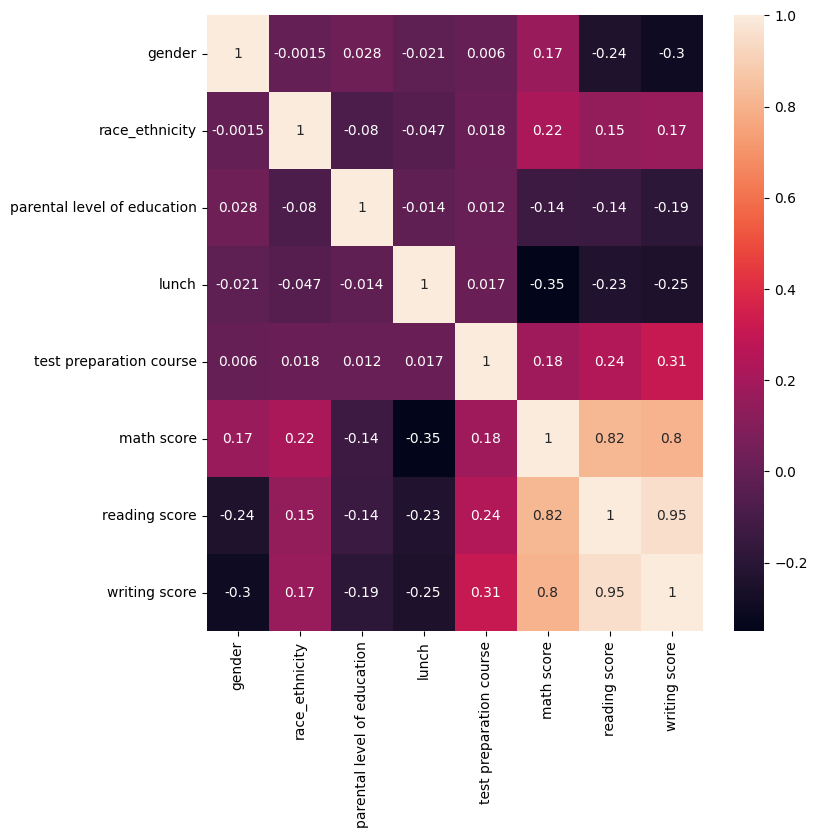

In [ ]:
#Avaliadando a correção entre as colunas
plt.figure(figsize =(8,8))
cor = dataset_df.corr()
sns.heatmap(cor,annot =True)

In [ ]:
#Dividir o banco em dados de treinamento é teste
y = dataset_df["math score"]
dataset_df = dataset_df.drop(['math score'],axis =1)
dataset_df = dataset_df.drop(['lunch'],axis =1)
#dataset_df = dataset_df.drop(['parental level of education'],axis =1)
X = dataset_df


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3)

# **4. APLICAÇÃO DO MODELO**

 Função para estimar metricas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calcula_metricas(y_test,preds):
    print('MAE:', mean_absolute_error(y_test, preds))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
    print('R2:', r2_score(y_test, preds))

Linear Regression

In [ ]:
# #### Treinando um modelo de Regressão Linear

#Instanciando o estimator.

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
#Iniciando o treinamento.

model.fit(X_train,y_train)

# Fazendo as predições

preds = model.predict(X_test)

In [ ]:
#Calculando as métricas.

calcula_metricas(y_test,preds)

MAE: 4.651798736342574
RMSE: 5.724134305809913
R2: 0.873599140929849


In [ ]:
resultado=model.score(X_test, y_test)
print("Resultado:", resultado)

Resultado: 0.873599140929849


In [ ]:
#Salvando o modelo Linear_Regression 

import joblib 

print(joblib.__version__)

filename = 'modelo-final-LR.pkl'
joblib.dump(model, filename)

1.2.0


['modelo-final-LR.pkl']

# **5. OUTROS MODELOS TESTADOS**

DummyRegressor

In [ ]:

from sklearn.dummy import DummyRegressor

model = DummyRegressor()

In [ ]:

# Iniciando o treinamento.

model.fit(X_train,y_train)

DummyRegressor()

In [ ]:
#Fazendo as predições

preds = model.predict(X_test)

#Calculando as métricas

calcula_metricas(y_test,preds)


MAE: 13.07457142857143
RMSE: 16.102515542694597
R2: -0.0002713952212440862


In [ ]:
resultado=model.score(X_test, y_test)
print("Resultado:", resultado)

Resultado: -0.0002713952212440862


Decision Tree

In [ ]:
#biblioteca para gerar o modelo 
from sklearn.tree import DecisionTreeClassifier

#validação cruzada para seleção de modelo 
from sklearn.model_selection import cross_val_score 

#criar o objeto com valores força bruta 
clf = DecisionTreeClassifier(random_state = 0)

#ajustar o modelo de classificação -> treinar o objeto 
clf.fit(X_train, y_train)

scores = cross_val_score(clf, X_train, y_train, cv = 5)
print(np.mean(scores))



0.05428571428571429


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
#imprimir a acurácia dos dados de treinamento
y_pred_train = clf.predict(X_train)
score_train = clf.score(X_train, y_train)
print('precisão global do treinamento----------')
print(score_train)

precisão global do treinamento----------
0.9971428571428571


In [ ]:
#imprimir a acurácia dos dados de teste
y_pred_test = clf.predict(X_test)
score_test = clf.score(X_test, y_test)
print('precisão global do teste----------')
print(score_test)

precisão global do teste----------
0.03


In [ ]:
resultado=model.score(X_test, y_test)
print("Resultado:", resultado)

Resultado: -0.0002713952212440862


In [ ]:
calcula_metricas(y_test,preds)

MAE: 13.07457142857143
RMSE: 16.102515542694597
R2: -0.0002713952212440862
